In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
import seaborn as sns

In [2]:
bcc1 = ["K"]
bcc2 = ["V"]
bcc3 = ["W"]
fcc1 = ["Al"]
fcc2 = ["Cu"]
fcc3 = ["Pd"]
hex1 = ["Ti"]
hex2 = ["Y"]
hex3 = ["Re"]

In [5]:
def get_mean_data_full(method,elements,sub_method=None):
    for el in elements:
        if el in ["Ti","Y","Re"]:
            sizes = range(1,8)
        else:
            sizes = range(1,12)
            
        for i in sizes:
            data = []
            kpd = []
            if sub_method is None:
                f = open("../data/{0}_{1}/{2}_atom_full_convergence.csv".format(el,method,i),"r")
            else:
                f = open("../data/{0}_{1}/{2}_{3}_atom_full_convergence.csv".format(el,method,i,sub_method),"r")
            reader = csv.reader(f,delimiter='\t')
            for row in reader:
                if int(row[0]) in kpd:
                    loc = kpd.index(int(row[0]))
                    data[loc][1] = (data[loc][1]+float(row[1]))/2.
                else:
                    kpd.append(int(row[0]))
                    point = [int(row[0]),float(row[1])]
                    data.append(point)
                    
            data = np.array(data)
            if len(data) >= 1:
                df = pd.DataFrame(data[:,1:],index=data[:,0])#,columns=[str(i)+' atom'])    
            else:
                print("element",el,"size",i)
                
            if i > 1 or el != elements[0]:
                outdf = pd.concat([outdf,df], axis=1)
            else:
                outdf = df

    outdf['mean'] = outdf.mean(axis=1) 
    outdf['count'] = outdf.apply(lambda x: x.count(), axis=1)
    return outdf

In [7]:
Mueller_V = get_mean_data_full("Mueller",bcc2)
Aflow_V = get_mean_data_full("AFLOW",bcc2)
Froyen_sc_V = get_mean_data_full("Froyen",bcc2,sub_method="sc")
Froyen_bcc_V = get_mean_data_full("Froyen",bcc2,sub_method="bcc")
Froyen_fcc_V = get_mean_data_full("Froyen",bcc2,sub_method="fcc")
Mueller_W = get_mean_data_full("Mueller",bcc3)
Aflow_W = get_mean_data_full("AFLOW",bcc3)
Froyen_sc_W = get_mean_data_full("Froyen",bcc3,sub_method="sc")
Froyen_bcc_W = get_mean_data_full("Froyen",bcc3,sub_method="bcc")
Froyen_fcc_W = get_mean_data_full("Froyen",bcc3,sub_method="fcc")
Mueller_K = get_mean_data_full("Mueller",bcc1)
Aflow_K = get_mean_data_full("AFLOW",bcc1)
Froyen_sc_K = get_mean_data_full("Froyen",bcc1,sub_method="sc")
Froyen_bcc_K = get_mean_data_full("Froyen",bcc1,sub_method="bcc")
Froyen_fcc_K = get_mean_data_full("Froyen",bcc1,sub_method="fcc")
Mueller_Pd = get_mean_data_full("Mueller",fcc3)
Aflow_Pd = get_mean_data_full("AFLOW",fcc3)
Froyen_sc_Pd = get_mean_data_full("Froyen",fcc3,sub_method="sc")
Froyen_bcc_Pd = get_mean_data_full("Froyen",fcc3,sub_method="bcc")
Froyen_fcc_Pd = get_mean_data_full("Froyen",fcc3,sub_method="fcc")
Mueller_Al = get_mean_data_full("Mueller",fcc1)
Aflow_Al = get_mean_data_full("AFLOW",fcc1)
Froyen_sc_Al = get_mean_data_full("Froyen",fcc1,sub_method="sc")
Froyen_bcc_Al = get_mean_data_full("Froyen",fcc1,sub_method="bcc")
Froyen_fcc_Al = get_mean_data_full("Froyen",fcc1,sub_method="fcc")
Mueller_Cu = get_mean_data_full("Mueller",fcc2)
Aflow_Cu = get_mean_data_full("AFLOW",fcc2)
Froyen_sc_Cu = get_mean_data_full("Froyen",fcc2,sub_method="sc")
Froyen_bcc_Cu = get_mean_data_full("Froyen",fcc2,sub_method="bcc")
Froyen_fcc_Cu = get_mean_data_full("Froyen",fcc2,sub_method="fcc")
Froyen_hcp_Ti = get_mean_data_full("Froyen",hex1,sub_method="hcp")
Mueller_Ti = get_mean_data_full("Mueller",hex1)
Aflow_Ti = get_mean_data_full("AFLOW",hex1)
Froyen_hcp_Y = get_mean_data_full("Froyen",hex2,sub_method="hcp")
Mueller_Y = get_mean_data_full("Mueller",hex2)
Aflow_Y = get_mean_data_full("AFLOW",hex2)
Froyen_hcp_Re = get_mean_data_full("Froyen",hex3,sub_method="hcp")
Mueller_Re = get_mean_data_full("Mueller",hex3)
Aflow_Re = get_mean_data_full("AFLOW",hex3)

In [21]:
def make_plot(m,a,sc=None,bcc=None,fcc=None,hx=None,title=None):
    if sc is not None:
        sc_d = np.asarray(sc.reset_index().loc[:,["index","mean"]])
        bcc_d = np.asarray(bcc.reset_index().loc[:,["index","mean"]])    
        fcc_d = np.asarray(fcc.reset_index().loc[:,["index","mean"]])
    else:
        hx_d = np.asarray(hx.reset_index().loc[:,["index","mean"]])
    m_d = np.asarray(m.reset_index().loc[:,["index","mean"]])
    a_d = np.asarray(a.reset_index().loc[:,["index","mean"]])
    
    if sc is not None:
        plt.plot(sc_d[:,0],sc_d[:,1],label="Froyen sc")
        plt.plot(bcc_d[:,0],bcc_d[:,1],label="Froyen bcc")
        plt.plot(fcc_d[:,0],fcc_d[:,1],label="Froyen fcc")
    else:
        plt.plot(hx_d[:,0],hx_d[:,1],label="Froyen hex")
    
    plt.plot(m_d[:,0],m_d[:,1],label="Mueller")
    plt.plot(a_d[:,0],a_d[:,1],label="AFLOW")
    plt.ylabel("Number of unique points")
    plt.xlabel("Number of irreducible k-points")
    plt.legend(loc="upper right")
    if title is not None:
        plt.title(title)
    plt.yscale('log')
    plt.xscale('log')   

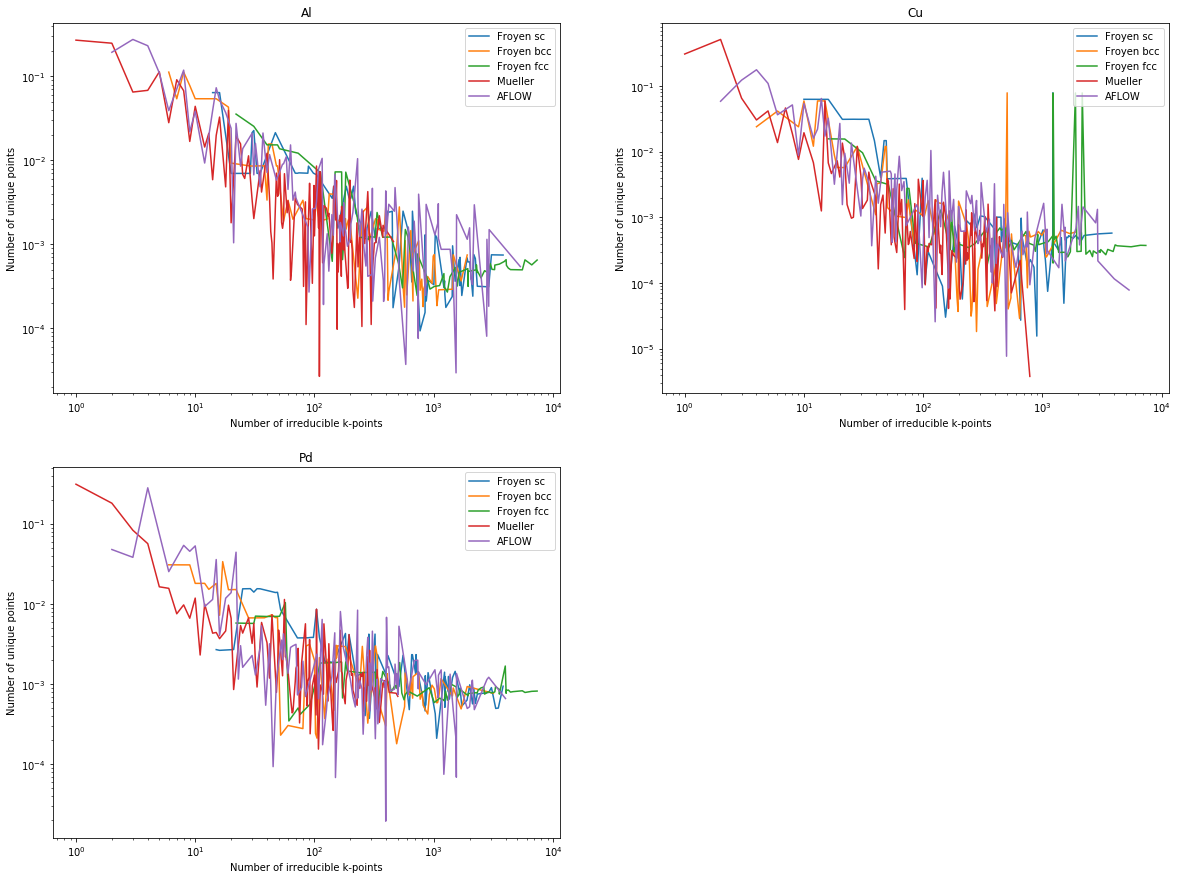

In [18]:
plt.figure(figsize=(20,15))
plt.subplot(221)
make_plot(Mueller_Al,Aflow_Al,sc=Froyen_bcc_Al,bcc=Froyen_sc_Al,fcc=Froyen_fcc_Al,title="Al")
plt.subplot(222)
make_plot(Mueller_Cu,Aflow_Cu,sc=Froyen_bcc_Cu,bcc=Froyen_sc_Cu,fcc=Froyen_fcc_Cu,title="Cu")
plt.subplot(223)
make_plot(Mueller_Pd,Aflow_Pd,sc=Froyen_bcc_Pd,bcc=Froyen_sc_Pd,fcc=Froyen_fcc_Pd,title="Pd")
plt.show()

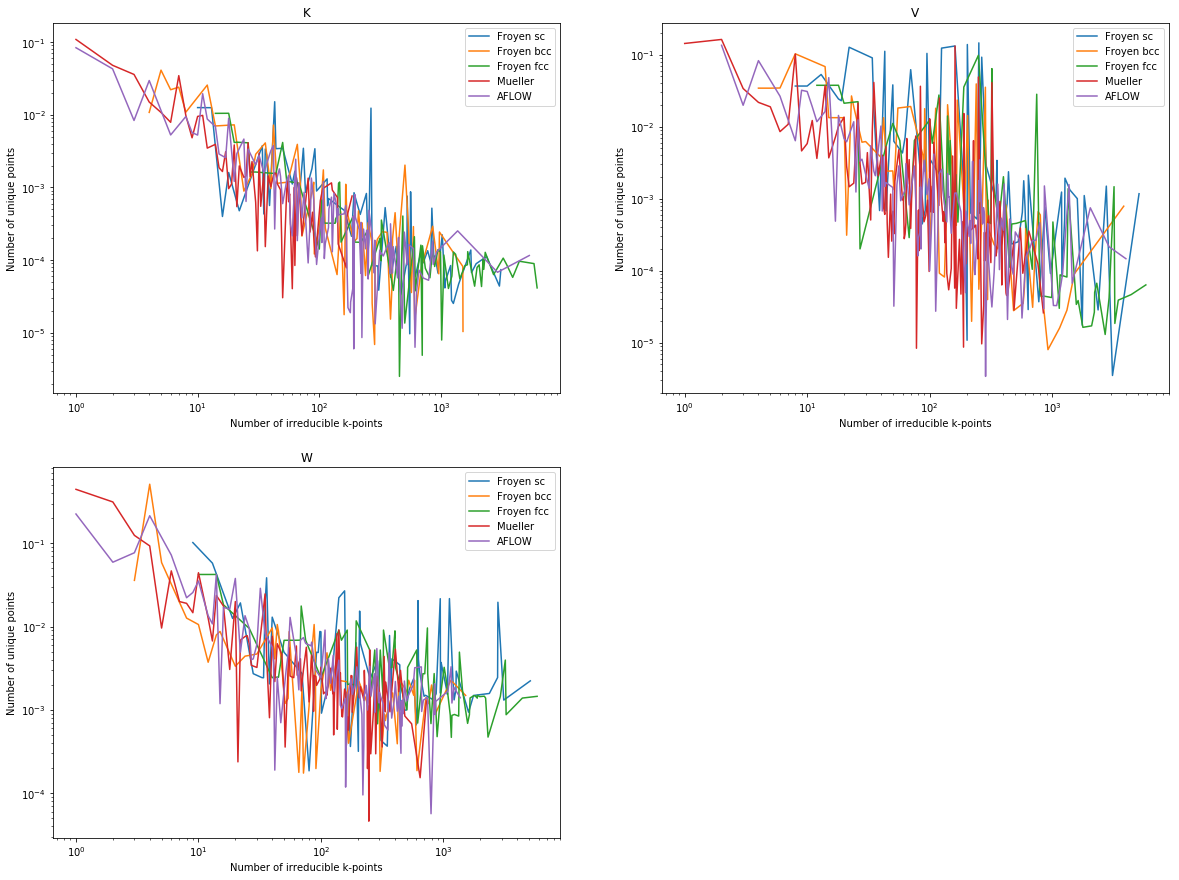

In [19]:
plt.figure(figsize=(20,15))
plt.subplot(221)
make_plot(Mueller_K,Aflow_K,sc=Froyen_bcc_K,bcc=Froyen_sc_K,fcc=Froyen_fcc_K,title="K")
plt.subplot(222)
make_plot(Mueller_V,Aflow_V,sc=Froyen_bcc_V,bcc=Froyen_sc_V,fcc=Froyen_fcc_V,title="V")
plt.subplot(223)
make_plot(Mueller_W,Aflow_W,sc=Froyen_bcc_W,bcc=Froyen_sc_W,fcc=Froyen_fcc_W,title="W")
plt.show()

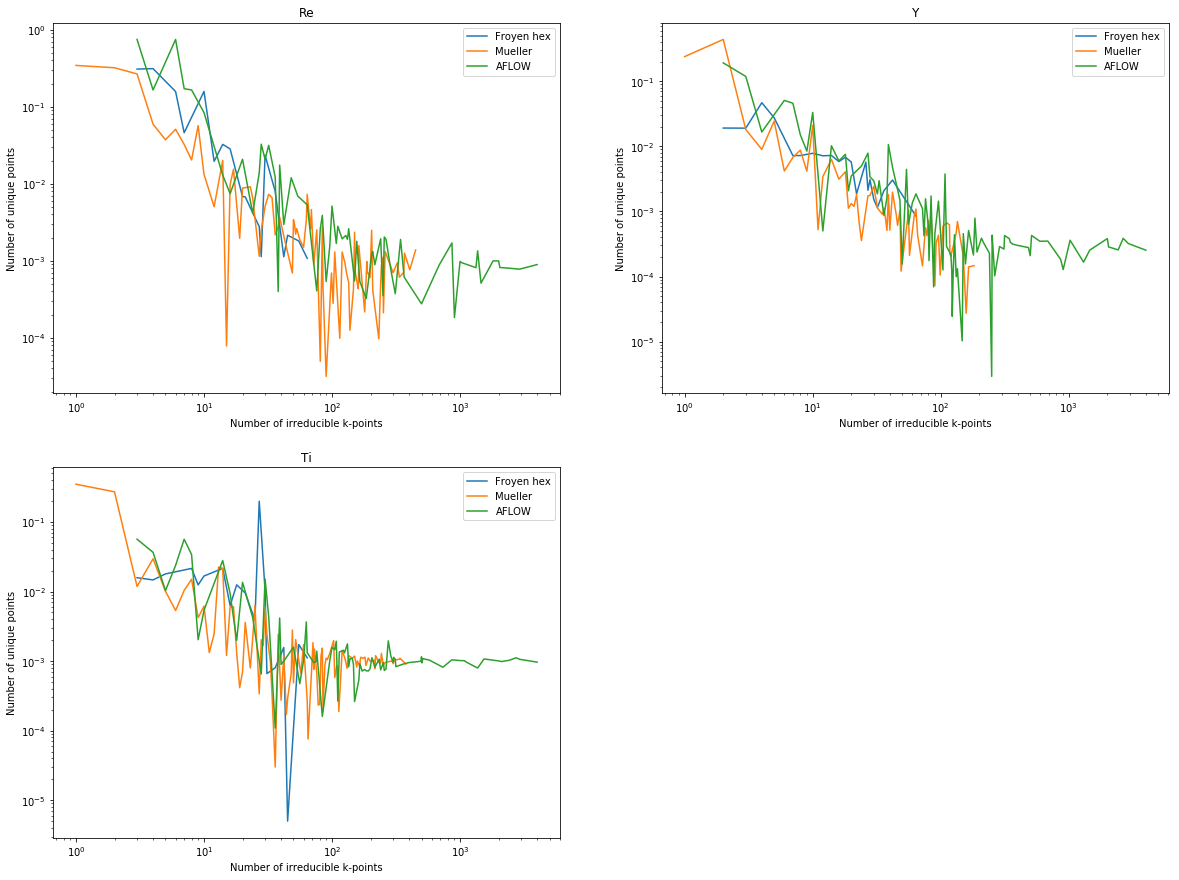

In [22]:
plt.figure(figsize=(20,15))
plt.subplot(221)
make_plot(Mueller_Re,Aflow_Re,hx=Froyen_hcp_Re,title="Re")
plt.subplot(222)
make_plot(Mueller_Y,Aflow_Y,hx=Froyen_hcp_Y,title="Y")
plt.subplot(223)
make_plot(Mueller_Ti,Aflow_Ti,hx=Froyen_hcp_Ti,title="Ti")
plt.show()